In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import torch

from pathlib import Path

from litgpt import Tokenizer
from litgpt.utils import check_valid_checkpoint_dir

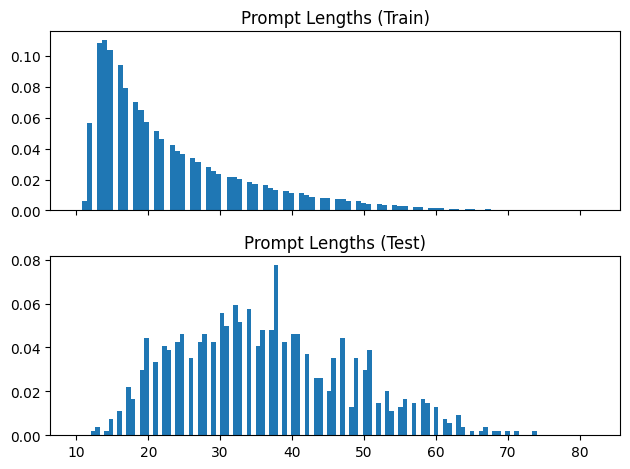

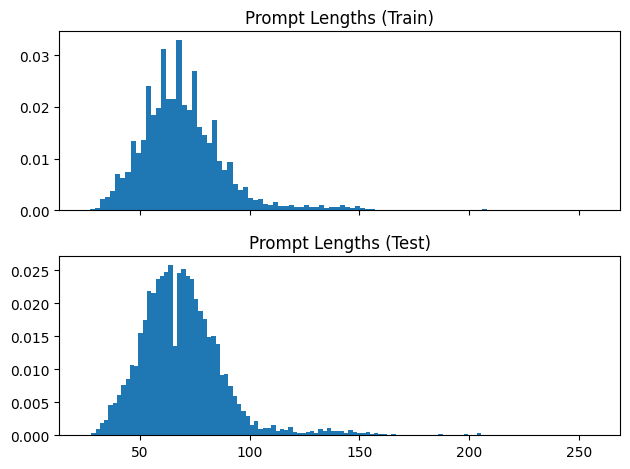

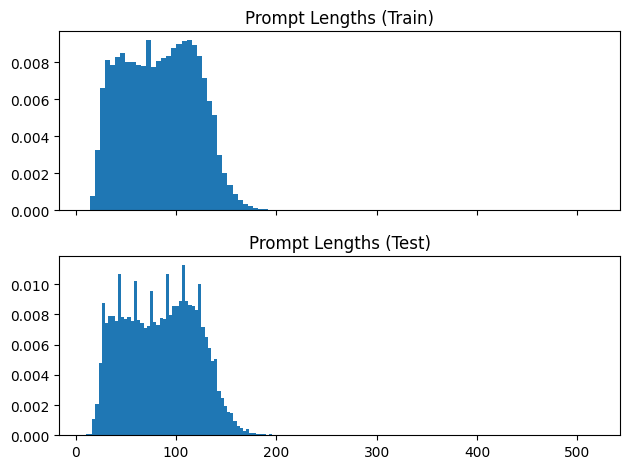

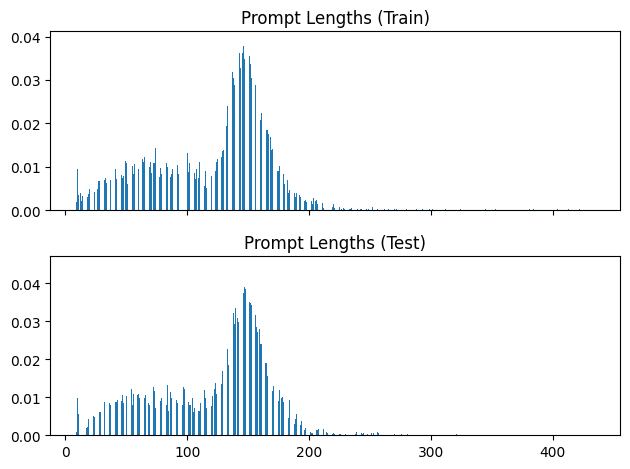

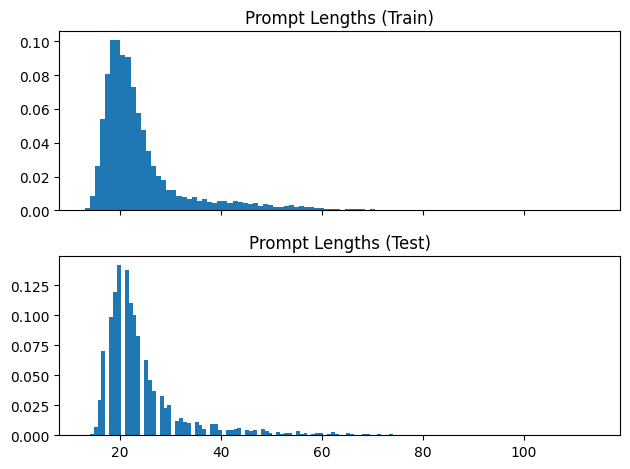

In [28]:
def compute_len(sample, tokenizer):
    prompt_ids = tokenizer.encode(sample['prompt'], bos=True).long()
    return prompt_ids.size(0)

def compute_prompt_lengths(data_dir, checkpoint_dir):
    torch.set_float32_matmul_precision("high")
    data_dir = Path(data_dir)
    checkpoint_dir = Path(checkpoint_dir).resolve()
    
    # Load tokenizer
    check_valid_checkpoint_dir(checkpoint_dir)
    tokenizer = Tokenizer(checkpoint_dir)

    sizes = []
    for split in ["train", "test"]:
        df = pd.read_json(data_dir / f"{split}_prompt.jsonl", lines=True).set_index("idx")
        df["num_tokens"] = df.apply(lambda x: compute_len(x,tokenizer), axis=1)
        sizes.append(df["num_tokens"])
    return sizes

def plot_prompt_lengths(sizes, nbins=100):
    fig, ax = plt.subplots(len(sizes), 1, sharex=True)
    for i, s in enumerate(sizes):
        ax[i].hist(s, bins=nbins, density=True)
        ax[i].set_title(f"Prompt Lengths ({['Train', 'Test'][i]})")
        # ax[i].set_xlim(0, 1000)
    fig.tight_layout()
    plt.show()

for nbins, dataset in [(100,"sst2"), (100,"agnews"), (100,"dbpedia"), (1000,"20newsgroups"), (100,"banking77")]:
    data_dir = f"../outputs/prompts/generative/{dataset}"
    checkpoint_dir = "../../../lit-checkpoints/TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T"
    sizes = compute_prompt_lengths(data_dir, checkpoint_dir)
    plot_prompt_lengths(sizes, nbins=nbins)